In [1]:
from gensim import corpora
from parameters import *
from NLP_preprocessing import *
from LDA_model import *

import warnings
warnings.filterwarnings('ignore')


#read dataset, only keep desired text column and rename it
data = read_data(in_dir = IN_DIR, filename = FILENAME, text_col = TEXT_COL , 
                 renamed_text_col = RENAMED_TEXT_COL, text_language = LANGUAGE)
cleaned_text = process_text_col(data, text_col = RENAMED_TEXT_COL)  # processed Text Data

# Create Dictionary
id2word = corpora.Dictionary(cleaned_text)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in cleaned_text]

In [ ]:
coherence_vs_topics(texts= cleaned_text,corpus = corpus, dictionary = id2word ,min_number_topics = 7, max_number_topics = 30 )

# from IPython.display import Image
# Image('out/coherence_Topics_plot.png')

In [3]:
# NUM_TOPICS = 9
lda_model = lda(num_topics = NUM_TOPICS, corpus = corpus , dictionary = id2word)

In [4]:
pd.set_option('display.max_colwidth', 100)
df_dominant_topic = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=cleaned_text)
df_dominant_topic.head()

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,7.0,0.5288,"not, find, update, pay, say, need, credit, page, instalment, dec","[not, find, assessment, log, time, setup, print, blank, page, say, page, print, print, page, bla..."
1,0.0,0.2652,"car, payment, want, available, email, error, way, balance, check, owe","[dissatisfied, car, time, table, reassessment, 2016, taxis]"
2,4.0,0.3955,"site, login, option, different, today, have, end, attempt, notice_assessment, slip","[site, not, user_friendly, specially, people, not, accustom, use, computer]"
3,4.0,0.4447,"site, login, option, different, today, have, end, attempt, notice_assessment, slip","[option, login, canada, site, feel, hide]"
4,6.0,0.5196,"not, information, account, look, able, access, 2017, get, answer, help","[not, access, spouse, wife, account, representative, living, czech, republic, not, easy, reach, ..."


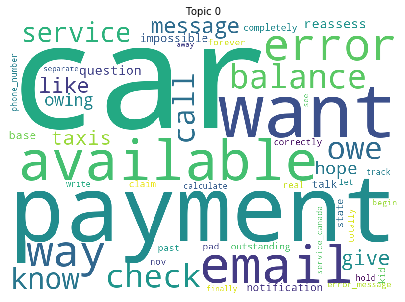

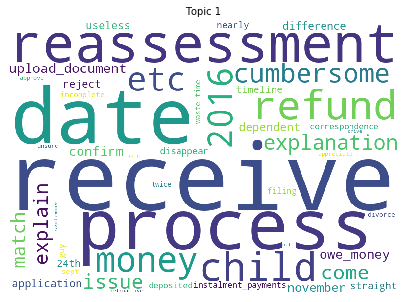

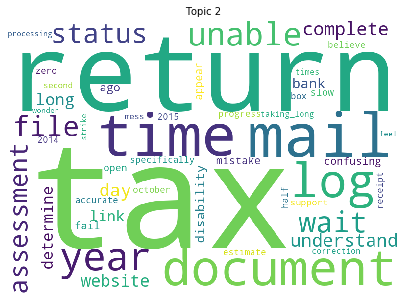

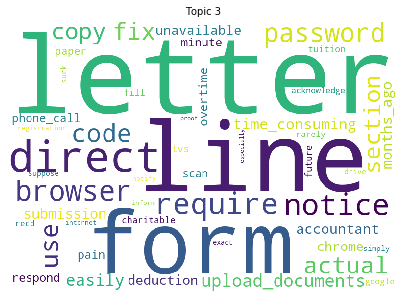

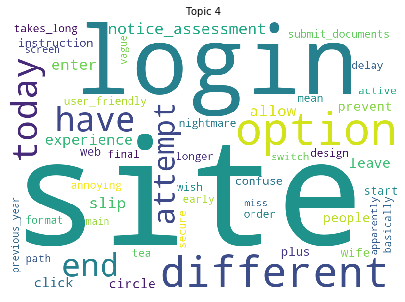

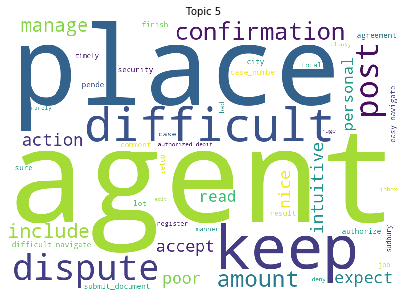

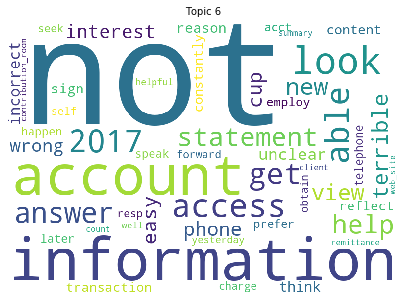

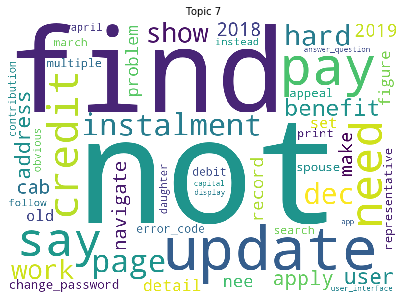

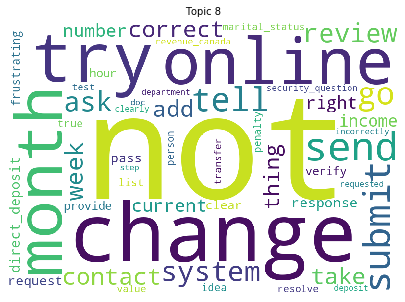

In [5]:
#Wordcloud 
get_wordcloud_LDA(ldamodel = lda_model, num_topics = NUM_TOPICS)

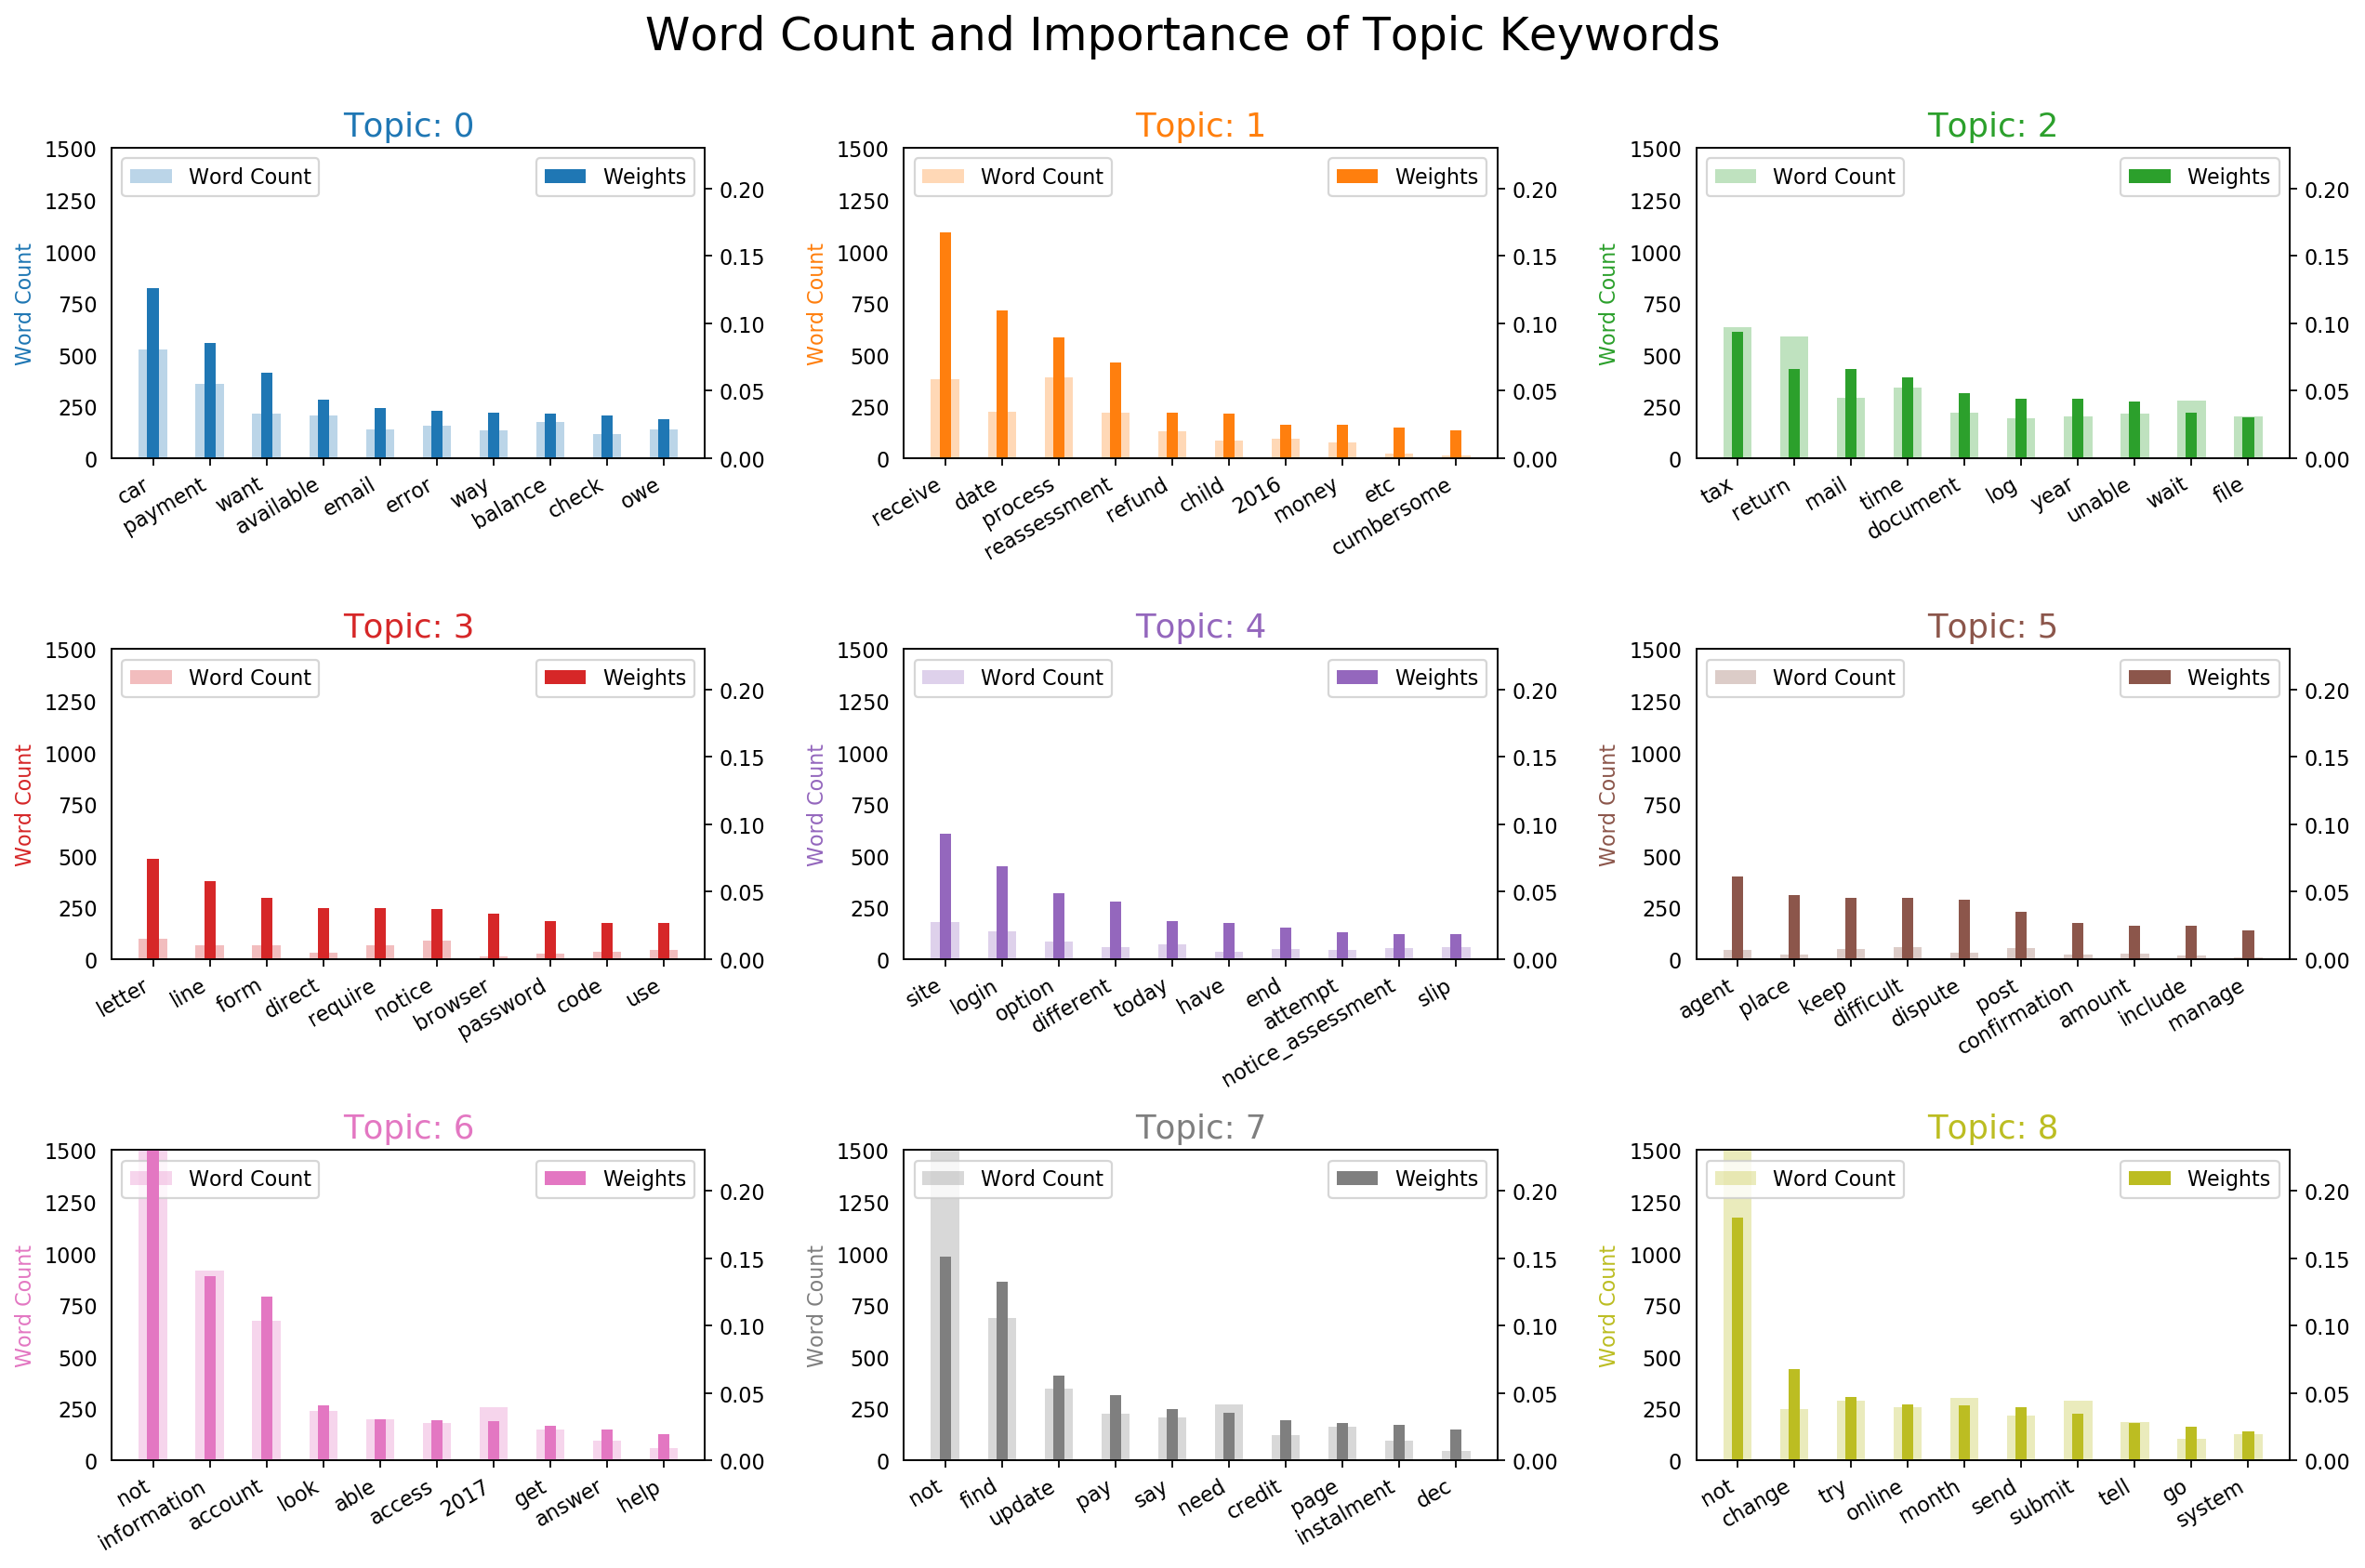

In [6]:
word_count_topic(ldamodel = lda_model, num_topics = NUM_TOPICS , texts = cleaned_text)

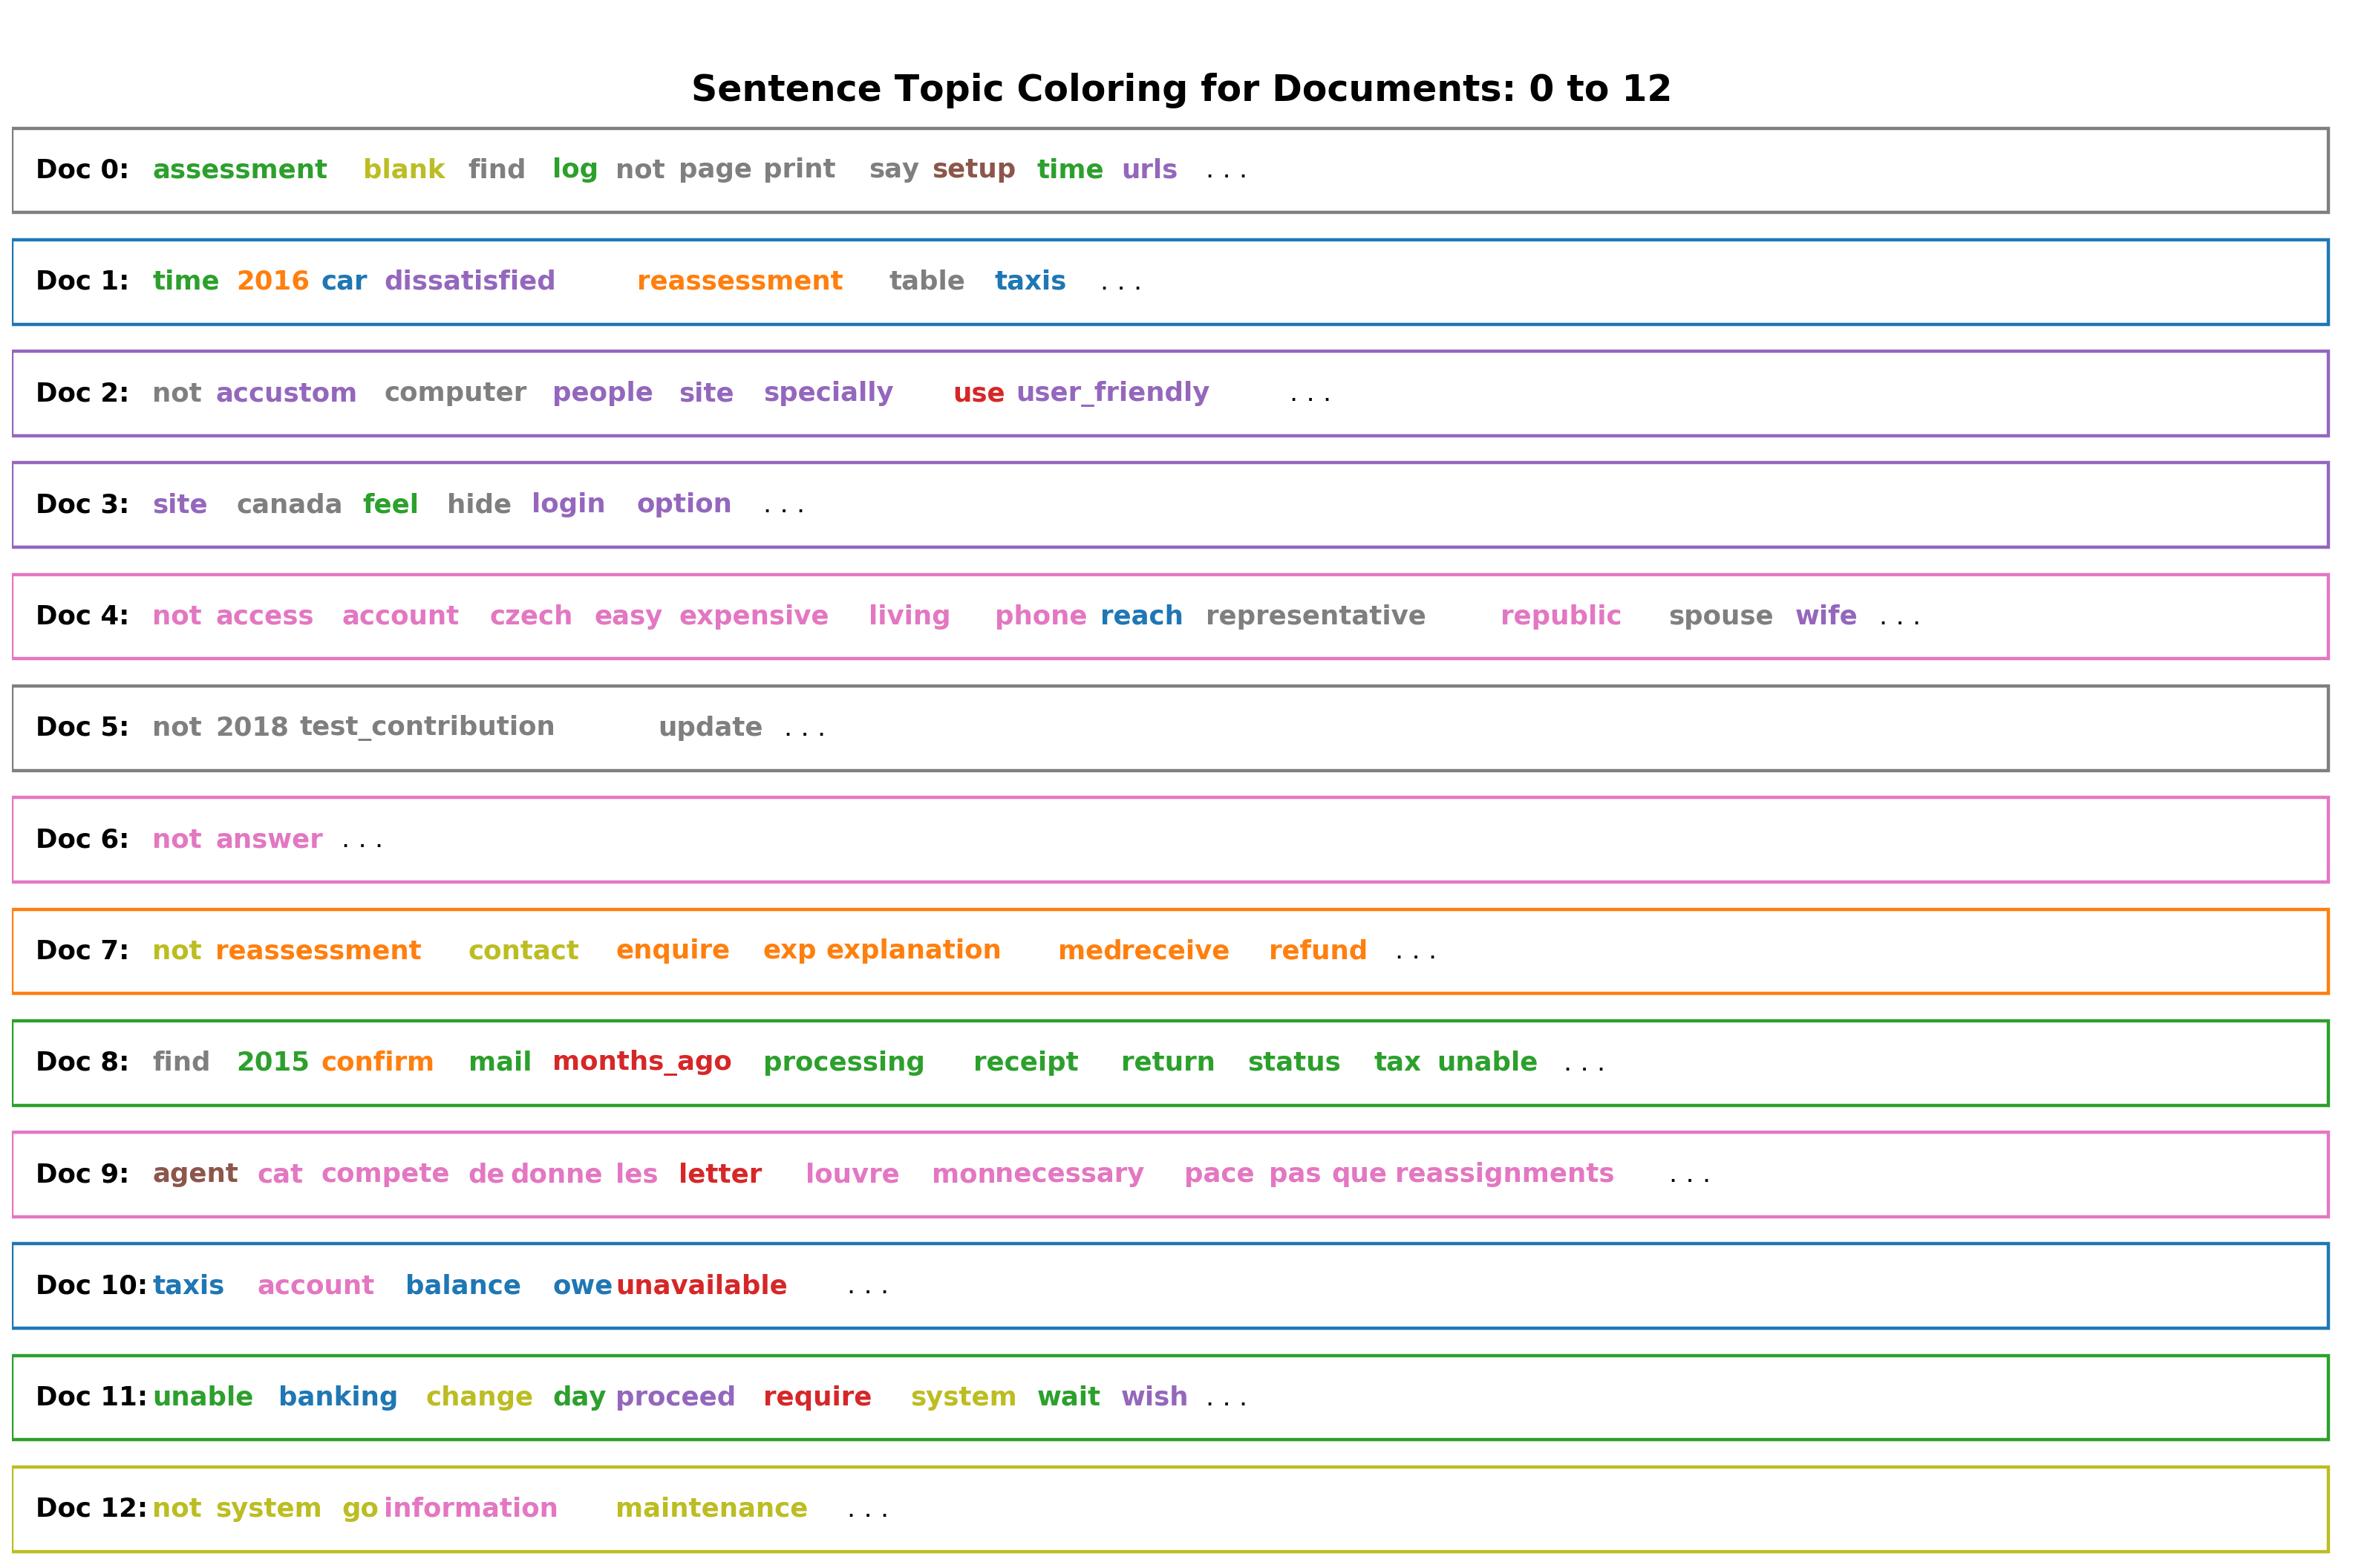

In [7]:
sentences_chart(ldamodel=lda_model, corpus=corpus, start = 0, end = 14)   

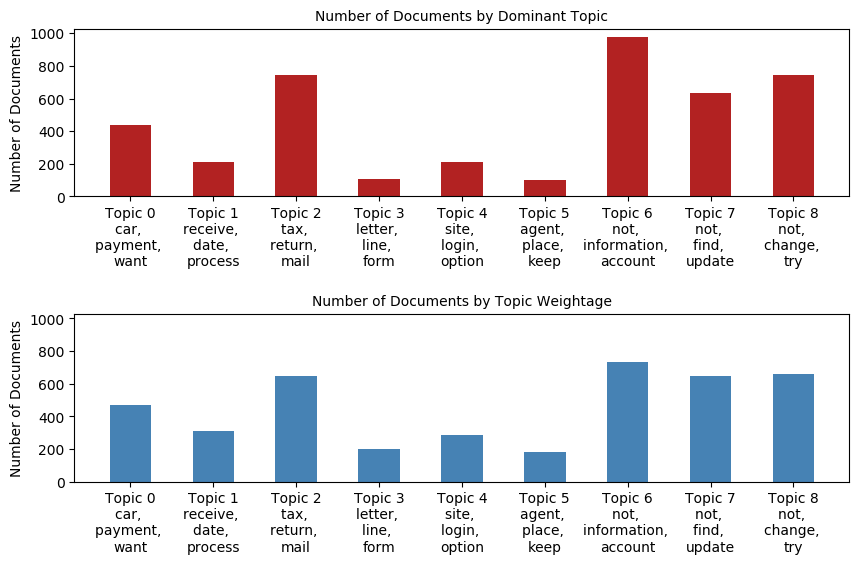

In [8]:
Plot_topic_dist(ldamodel= lda_model, num_topics = NUM_TOPICS, corpus = corpus)

In [9]:
tsne_plot(ldamodel = lda_model, corpus = corpus,num_topics = NUM_TOPICS , Keep_well_separated_pcnt = 0.35)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2467 samples in 0.010s...
[t-SNE] Computed neighbors for 2467 samples in 0.184s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2467
[t-SNE] Computed conditional probabilities for sample 2000 / 2467
[t-SNE] Computed conditional probabilities for sample 2467 / 2467
[t-SNE] Mean sigma: 0.001548
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.233498
[t-SNE] KL divergence after 1000 iterations: 0.850807


Loading BokehJS ...

In [10]:
pyldavis_plot(ldamodel = lda_model ,corpus = corpus,  mds = "tsne")

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
8      111.092506 -133.722946       1        1  16.953186
6       34.946613  107.064590       2        1  16.119745
2      -28.088213 -159.949036       3        1  15.789633
7      147.698074   21.369604       4        1  15.146274
0      -97.501183  126.981384       5        1  11.911805
1       30.312096  -32.794945       6        1   7.426630
4     -155.443665 -118.494690       7        1   7.217616
3     -204.248108   22.596130       8        1   4.993872
5      -79.404678   -6.864717       9        1   4.441229, topic_info=               Term         Freq        Total Category  logprob  loglift
4               not  3292.000000  3292.000000  Default  30.0000  30.0000
91      information   796.000000   796.000000  Default  29.0000  29.0000
2              find   727.000000   727.000000  Default  28.0000  28.0000
30          account   708.000000   708.000000  Default  27.0000  27.0000
50          receive   450.000000   450.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
392     case_number    16.987486    17.905167   Topic9  -4.5488   3.0616
757          finish    16.432688    17.350574   Topic9  -4.5820   3.0599
429       authorize    15.419186    16.338501   Topic9  -4.6456   3.0563
1558  easy_navigate    15.182716    16.099520   Topic9  -4.6611   3.0556
968         comment    18.932720    20.222408   Topic9  -4.4404   3.0483

[309 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
111       3  0.957372   2014
11        6  0.981335   2016
148       2  0.994053   2017
41        4  0.982980   2018
1474      4  0.976543   2019
...     ...       ...    ...
241       1  0.994489   week
40        7  0.981306   wife
97        4  0.994484   work
648       2  0.976093  wrong
181       3  0.994709   year

[285 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 3, 8, 1, 2, 5, 4, 6])